# TripleTen - Predicting Churn for Interconnect, a Telecom Company

## **Project Plan**

**Overall Summary**

The client Interconnect is a telecom company looking for a solution to forecast and address client churn. Our data team has been tasked by the client’s marketing team to predict customer churn in order to offer promotional codes and special plan options to address / reduce customer churn.

**About Interconnect**

Interconnect provides two primary services: landline communication and internet. Interconnect also provides auxiliary services: internet security, technical support, cloud storage and TV streaming with a movie directory. Interconnect’s customers purchase services on a subscription basis on either a 1- or 2-year contract and are electronically invoiced.

**Churn at Interconnect**

Churn could be assessed monthly, quarterly or annually and the strategies for addressing each type of churn will vary by timeframe.

**Data, Assets and other Resources**

Interconnect has provided data including: contract information, customer personal data, internet services, phone services. The data can be used to engineer features for further analysis.

**Recommended Scope of Work**

*Development of Project Plan:* The Project Plan provides a baseline and high level overview and SOW
- Provide a draft of project plan and high level scope of work detailing the project workflow, deliverables and timeline. This requires a preview of the RAW data.
- Timing: 1 Day

*Data Collection and Exploratory Data Analysis:* An analysis of the RAW data for trends and feature engineering
- Examine and analyze data; clean, merge, combine data; standardize data formats; develop descriptive statistics to inform feature engineering and predictive model.
- Visualization of trends in the data.
- Timing: 2 Days

*Feature Engineering:* Creation of new features from the data to inform the predictive model
- Create new features based on observable elements and trends in the data. 
- Develop features to classify users by longevity, and customer loyalty
- Timing: 2 Days

*Model Selection and Training for Predictive Modeling:* Development of an ML model to predict churn
- Select and test a model that will predict customer churn. Data split for training, validation and testing. 
- Fine tune the model to optimize performance
- Evaluate various boosting methodologies to improve accuracy of the model
- Timing: 1-2 Days

*Quality Assurance / Quality Review:* Check on accuracy of the code and methodology outlined above.
- Ensure accuracy and precision of analytics and predictive model via internal review. 

*Conclusions and Recommendations:* Strategy recommendations for the marketing team based on data findings and churn predictions.
- Compile a final set of recommendations and action steps to reduce churn based on analytics and predictive modeling. Provide recommendations for model deployment and monitoring of customer churn. 
- Timing: 2 Days

**Project Timetable (Estimated): 9-10 Days**

**Deliverables:** 

Churn Model
- Develop and test churn model with corresponding retention strategy for Marketing Team
- Create a set of performance tracking recommendations to monitor post-deployment

Performance Indicators:
- Model Accuracy Score
- ROI on project (description only)


## Data Collection and Checks for Data Integrity

These preliminary checks are insight into the quality of the RAW data and are used to inform the Scope of Work (SOW) above and the anlyses needed to meet the project deliverables.

In [1]:
# Preliminary import of libraries for data manipulation and EDA

import numpy as np
import pandas as pd
from datetime import datetime

In [2]:
# Import secondary libraries for EDA visualization

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Import tools for Encoding categorical variables

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [4]:
# Import tools for model training

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV

# Tools to scale data and prevent data leakage

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [5]:
# Read data files provided by client 

contract = pd.read_csv('/datasets/final_provider/contract.csv')
personal = pd.read_csv('/datasets/final_provider/personal.csv')
internet = pd.read_csv('/datasets/final_provider/internet.csv')
phone = pd.read_csv('/datasets/final_provider/phone.csv')

*Note:* Below are some basic snapshots of each database's header. The data appears standard and coherent.

In [6]:
contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [7]:
personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [8]:
internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [9]:
phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


*Note:* Data is readable and consistent and requires minor formatting adjustments in order to streamline analysis.

*Note:* Further information on each dataset can be found below, including number of entries, columns, and data types. We recognize that the customerID can be used as a unique identifier across the datasets provided. Personal info does not need to be obfuscated and clients are not identifiable. Data may need to be encoded via OHE or other encoding methodology for analysis.

### Information about data types

In [10]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [11]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [12]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [13]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


### Data Examination / Cleaning

Below are two important checks to ensure that 1) each data entry is unique and 2) that there are no null values in the current data set. Conclusively there are no duplicates or null values.

In [14]:
def duplicates_check(df):
    """
    Check for duplicate rows.

    Parameters:
    df (pandas.DataFrame): The DataFrame to check for duplicates.

    Returns:
    pandas.DataFrame: DataFrame with duplicate rows. Returns empty DataFrame if no duplicates
    """
    # Check for duplicate rows
    duplicate_rows = df[df.duplicated()]
    
    # If there are duplicate rows, return them
    if not duplicate_rows.empty:
        return duplicate_rows
    else:
        return print("No duplicate rows found.") # If no duplicates, return with print message

In [15]:
duplicates_check(contract)

No duplicate rows found.


In [16]:
duplicates_check(personal)

No duplicate rows found.


In [17]:
duplicates_check(internet)

No duplicate rows found.


In [18]:
duplicates_check(phone)

No duplicate rows found.


In [19]:
def nan_check(df):
    """
    Check for rows with missing values (NaNs) in a DataFrame.

    Parameters:
    df (pandas.DataFrame): The DataFrame to check for missing values.

    Returns:
    pandas.DataFrame: A DataFrame containing the rows with missing values, if any.
    """
    # Check for rows with missing values
    missing_value_rows = df[df.isna().any(axis=1)]
    
    # If there are rows with missing values, return them
    if not missing_value_rows.empty:
        return missing_value_rows
    else:
        return print("No NaN values found.") # If no NaN, return with print message

In [20]:
nan_check(contract)

No NaN values found.


In [21]:
nan_check(personal)

No NaN values found.


In [22]:
nan_check(internet)

No NaN values found.


In [23]:
nan_check(phone)

No NaN values found.


*Note* After the preliminary data checks above, minor modifications to the data are necessary, including standardizing naming and timestamps. The data may require encoding for certain 'yes/no' indicators.

The data provided is sufficient for further analysis.

### Unique Values

Below we check for unique values for future reference

In [24]:
def unique(df):
    """ Checks for unique values in each column in a data frame """
    columns = df.columns.tolist()
    for column in columns:
        print(f"{column} unique values : {df[column].unique()}")

In [25]:
unique(contract)

customerID unique values : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
BeginDate unique values : ['2020-01-01' '2017-04-01' '2019-10-01' '2016-05-01' '2019-09-01'
 '2019-03-01' '2018-04-01' '2019-04-01' '2017-07-01' '2014-12-01'
 '2019-01-01' '2018-10-01' '2015-04-01' '2015-09-01' '2018-01-01'
 '2014-05-01' '2015-10-01' '2014-03-01' '2018-05-01' '2019-11-01'
 '2019-02-01' '2016-01-01' '2017-08-01' '2015-12-01' '2014-02-01'
 '2018-06-01' '2019-12-01' '2017-11-01' '2019-06-01' '2016-04-01'
 '2017-02-01' '2018-12-01' '2014-04-01' '2018-09-01' '2014-11-01'
 '2016-07-01' '2015-02-01' '2018-07-01' '2014-08-01' '2016-03-01'
 '2018-08-01' '2014-10-01' '2015-06-01' '2016-08-01' '2019-05-01'
 '2017-03-01' '2016-02-01' '2017-09-01' '2014-09-01' '2017-12-01'
 '2016-12-01' '2017-06-01' '2015-05-01' '2016-10-01' '2016-09-01'
 '2019-08-01' '2019-07-01' '2017-05-01' '2017-10-01' '2014-07-01'
 '2018-03-01' '2015-01-01' '2018-11-01' '2015-03-01' '2018-02-01'
 '20

In [26]:
unique(personal)

customerID unique values : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender unique values : ['Female' 'Male']
SeniorCitizen unique values : [0 1]
Partner unique values : ['Yes' 'No']
Dependents unique values : ['No' 'Yes']


In [27]:
unique(internet)

customerID unique values : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
InternetService unique values : ['DSL' 'Fiber optic']
OnlineSecurity unique values : ['No' 'Yes']
OnlineBackup unique values : ['Yes' 'No']
DeviceProtection unique values : ['No' 'Yes']
TechSupport unique values : ['No' 'Yes']
StreamingTV unique values : ['No' 'Yes']
StreamingMovies unique values : ['No' 'Yes']


In [28]:
unique(phone)

customerID unique values : ['5575-GNVDE' '3668-QPYBK' '9237-HQITU' ... '2234-XADUH' '8361-LTMKD'
 '3186-AJIEK']
MultipleLines unique values : ['No' 'Yes']


### Data Cleaning

Below we standaradize the data: lowercase column names, convert data to the appropriate types. For example, Total Charges needs to be converted to float64.

In [29]:
# Convert all columns to lowercase

contract.columns = contract.columns.str.lower()
personal.columns = personal.columns.str.lower()
internet.columns = internet.columns.str.lower()
phone.columns = phone.columns.str.lower()

In [30]:
# Convert 'totalcharges' to float, note that there may now be NaN values in the dataframe

contract['totalcharges'] = pd.to_numeric(contract['totalcharges'], errors = 'coerce')

In [31]:
contract.dtypes

customerid           object
begindate            object
enddate              object
type                 object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
dtype: object

In [32]:
nan_check(contract)

,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,NaN
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,NaN
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,NaN
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,NaN
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,NaN
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,NaN
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,NaN
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,NaN
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,NaN


In [33]:
nan_count = contract['totalcharges'].isna().sum()
print(nan_count)

11


Note the above NaN values can be dropped as they represent a very small portion (0.15%) of the total dataset

In [34]:
contract = contract.dropna()

In [35]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7032 non-null   object 
 1   begindate         7032 non-null   object 
 2   enddate           7032 non-null   object 
 3   type              7032 non-null   object 
 4   paperlessbilling  7032 non-null   object 
 5   paymentmethod     7032 non-null   object 
 6   monthlycharges    7032 non-null   float64
 7   totalcharges      7032 non-null   float64
dtypes: float64(2), object(6)
memory usage: 494.4+ KB


Below we will define churn as a customer who does not have an end date

In [36]:
# Create a column for churn

contract['churn'] = np.where(contract['enddate'] == 'No', 'No', 'Yes')

In [37]:
contract.head()

,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Exploratory Data Analysis

To perform EDA the data sets must me merged into one singular data set; dates must be converted into date time format.

In [38]:
# Merge data sets into one data frame using contract as the main df

# Merge personal into contract
df = pd.merge(contract, personal, on='customerid', how='left')

# Merge internet information
df = pd.merge(df, internet, on='customerid', how='left')

# Merge D into the result
df = pd.merge(df, phone, on='customerid', how='left')

In [39]:
df.head()

,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,gender,...,partner,dependents,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,multiplelines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.50,No,Male,...,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,Fiber optic,No,No,No,No,No,No,No


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7032 non-null   object 
 1   begindate         7032 non-null   object 
 2   enddate           7032 non-null   object 
 3   type              7032 non-null   object 
 4   paperlessbilling  7032 non-null   object 
 5   paymentmethod     7032 non-null   object 
 6   monthlycharges    7032 non-null   float64
 7   totalcharges      7032 non-null   float64
 8   churn             7032 non-null   object 
 9   gender            7032 non-null   object 
 10  seniorcitizen     7032 non-null   int64  
 11  partner           7032 non-null   object 
 12  dependents        7032 non-null   object 
 13  internetservice   5512 non-null   object 
 14  onlinesecurity    5512 non-null   object 
 15  onlinebackup      5512 non-null   object 
 16  deviceprotection  5512 non-null   object 


In [41]:
df = df.fillna("No")

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7032 non-null   object 
 1   begindate         7032 non-null   object 
 2   enddate           7032 non-null   object 
 3   type              7032 non-null   object 
 4   paperlessbilling  7032 non-null   object 
 5   paymentmethod     7032 non-null   object 
 6   monthlycharges    7032 non-null   float64
 7   totalcharges      7032 non-null   float64
 8   churn             7032 non-null   object 
 9   gender            7032 non-null   object 
 10  seniorcitizen     7032 non-null   int64  
 11  partner           7032 non-null   object 
 12  dependents        7032 non-null   object 
 13  internetservice   7032 non-null   object 
 14  onlinesecurity    7032 non-null   object 
 15  onlinebackup      7032 non-null   object 
 16  deviceprotection  7032 non-null   object 


In [43]:
# Date time function to convert dates to date time for analysis

df['begindate'] = pd.to_datetime(df['begindate'], format='%Y-%m-%d')
df['enddate'] = pd.to_datetime(df['enddate'], errors='coerce', format='%Y-%m-%d')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerid        7032 non-null   object        
 1   begindate         7032 non-null   datetime64[ns]
 2   enddate           1869 non-null   datetime64[ns]
 3   type              7032 non-null   object        
 4   paperlessbilling  7032 non-null   object        
 5   paymentmethod     7032 non-null   object        
 6   monthlycharges    7032 non-null   float64       
 7   totalcharges      7032 non-null   float64       
 8   churn             7032 non-null   object        
 9   gender            7032 non-null   object        
 10  seniorcitizen     7032 non-null   int64         
 11  partner           7032 non-null   object        
 12  dependents        7032 non-null   object        
 13  internetservice   7032 non-null   object        
 14  onlinesecurity    7032 n

In [45]:
unique(df)

customerid unique values : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
begindate unique values : ['2020-01-01T00:00:00.000000000' '2017-04-01T00:00:00.000000000'
 '2019-10-01T00:00:00.000000000' '2016-05-01T00:00:00.000000000'
 '2019-09-01T00:00:00.000000000' '2019-03-01T00:00:00.000000000'
 '2018-04-01T00:00:00.000000000' '2019-04-01T00:00:00.000000000'
 '2017-07-01T00:00:00.000000000' '2014-12-01T00:00:00.000000000'
 '2019-01-01T00:00:00.000000000' '2018-10-01T00:00:00.000000000'
 '2015-04-01T00:00:00.000000000' '2015-09-01T00:00:00.000000000'
 '2018-01-01T00:00:00.000000000' '2014-05-01T00:00:00.000000000'
 '2015-10-01T00:00:00.000000000' '2014-03-01T00:00:00.000000000'
 '2018-05-01T00:00:00.000000000' '2019-11-01T00:00:00.000000000'
 '2019-02-01T00:00:00.000000000' '2016-01-01T00:00:00.000000000'
 '2017-08-01T00:00:00.000000000' '2015-12-01T00:00:00.000000000'
 '2014-02-01T00:00:00.000000000' '2018-06-01T00:00:00.000000000'
 '2019-12-01T00:0

#### EDA Data Dive - Churn in the General Population

In [46]:
df.describe()

,monthlycharges,totalcharges,seniorcitizen
count,7032.000000,7032.000000,7032.000000
mean,64.798208,2283.300441,0.162400
std,30.085974,2266.771362,0.368844
min,18.250000,18.800000,0.000000
25%,35.587500,401.450000,0.000000
50%,70.350000,1397.475000,0.000000
75%,89.862500,3794.737500,0.000000
max,118.750000,8684.800000,1.000000


Note: The data show average monthly charges of 64.79, ranging from 18.25 - 118.75, and average total charges of 2283.30 for customers in the dataset. 
- Additionally senior citizen should be encoded, though it is apparent that most customers are not senior citizens.

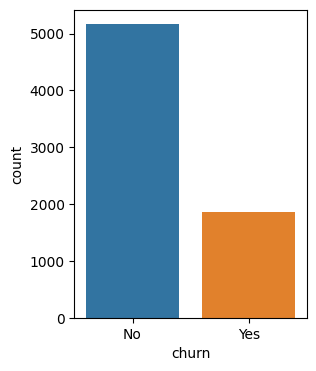

In [47]:
plt.figure(figsize=(3,4))
ax = sns.countplot(x = df["churn"])
plt.show()

In [48]:
churn_counts = df['churn'].value_counts()

In [49]:
print(churn_counts)

No     5163
Yes    1869
Name: churn, dtype: int64


As of 2020-02-01, 1869 or 26% of customers have churned.

### Household Demographics and Churn

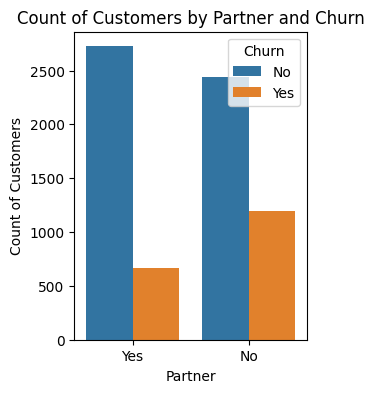

In [50]:
plt.figure(figsize=(3, 4))
sns.countplot(data=df, x='partner', hue='churn')
plt.title('Count of Customers by Partner and Churn')
plt.xlabel('Partner')
plt.ylabel('Count of Customers')
plt.legend(title='Churn')
plt.show()

Note: Households with partners tend to have lower churn (blue)

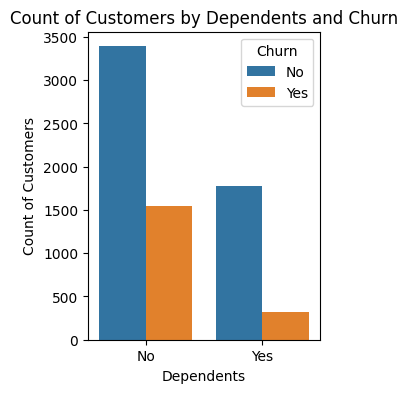

In [51]:
plt.figure(figsize=(3, 4))
sns.countplot(data=df, x='dependents', hue='churn')
plt.title('Count of Customers by Dependents and Churn')
plt.xlabel('Dependents')
plt.ylabel('Count of Customers')
plt.legend(title='Churn')
plt.show()

Note: Households with dependents tend to have lower churn (blue)

### Service Offerings and Churn

- The following visualizes the relationships between service offerings and churn
- Services include: Internet Service, Online Security, Online Backup, Device Protection, Streaming TV, Streaming Movies, and Multiple Lines(Phone Service)

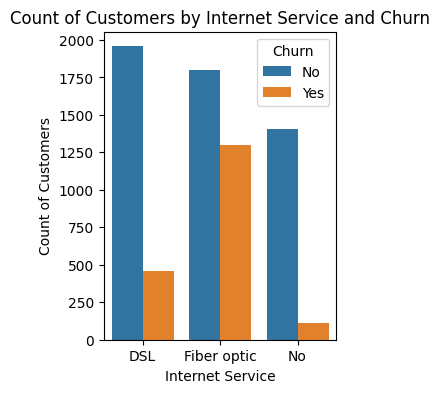

In [52]:
plt.figure(figsize=(3, 4))
sns.countplot(data=df, x='internetservice', hue='churn')
plt.title('Count of Customers by Internet Service and Churn')
plt.xlabel('Internet Service')
plt.ylabel('Count of Customers')
plt.legend(title='Churn')
plt.show()

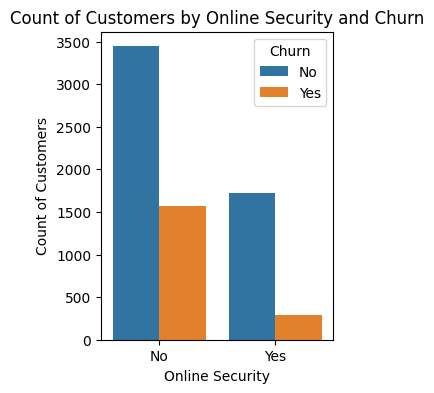

In [53]:
plt.figure(figsize=(3, 4))
sns.countplot(data=df, x='onlinesecurity', hue='churn')
plt.title('Count of Customers by Online Security and Churn')
plt.xlabel('Online Security')
plt.ylabel('Count of Customers')
plt.legend(title='Churn')
plt.show()

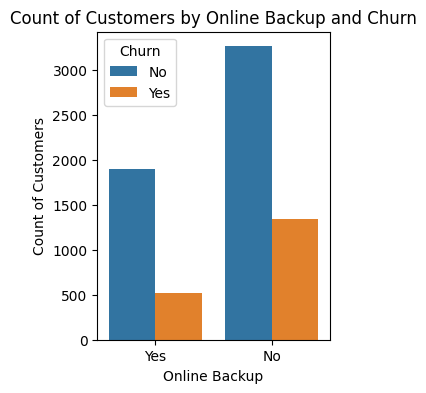

In [54]:
plt.figure(figsize=(3, 4))
sns.countplot(data=df, x='onlinebackup', hue='churn')
plt.title('Count of Customers by Online Backup and Churn')
plt.xlabel('Online Backup')
plt.ylabel('Count of Customers')
plt.legend(title='Churn')
plt.show()

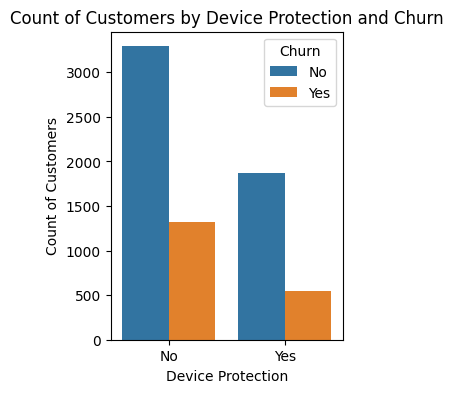

In [55]:
plt.figure(figsize=(3, 4))
sns.countplot(data=df, x='deviceprotection', hue='churn')
plt.title('Count of Customers by Device Protection and Churn')
plt.xlabel('Device Protection')
plt.ylabel('Count of Customers')
plt.legend(title='Churn')
plt.show()

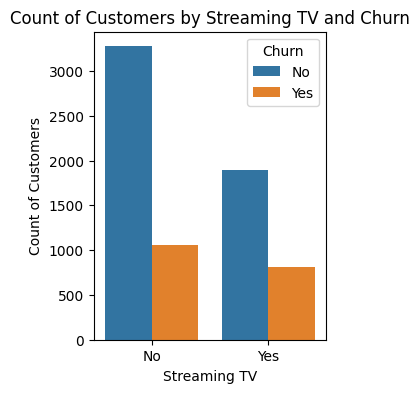

In [56]:
plt.figure(figsize=(3, 4))
sns.countplot(data=df, x='streamingtv', hue='churn')
plt.title('Count of Customers by Streaming TV and Churn')
plt.xlabel('Streaming TV')
plt.ylabel('Count of Customers')
plt.legend(title='Churn')
plt.show()

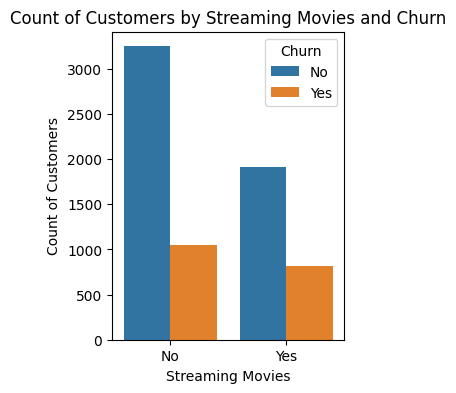

In [57]:
plt.figure(figsize=(3, 4))
sns.countplot(data=df, x='streamingmovies', hue='churn')
plt.title('Count of Customers by Streaming Movies and Churn')
plt.xlabel('Streaming Movies')
plt.ylabel('Count of Customers')
plt.legend(title='Churn')
plt.show()

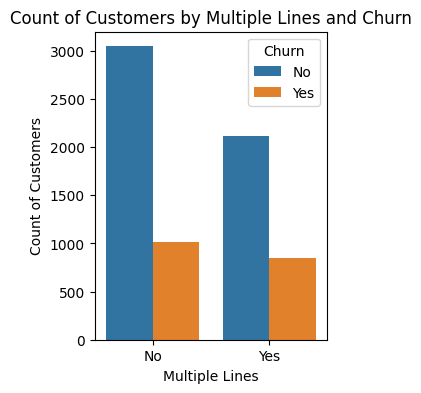

In [58]:
plt.figure(figsize=(3, 4))
sns.countplot(data=df, x='multiplelines', hue='churn')
plt.title('Count of Customers by Multiple Lines and Churn')
plt.xlabel('Multiple Lines')
plt.ylabel('Count of Customers')
plt.legend(title='Churn')
plt.show()

Further analysis is needed to determine which services correlate with lower churn overall.

### Customer Payment and Churn

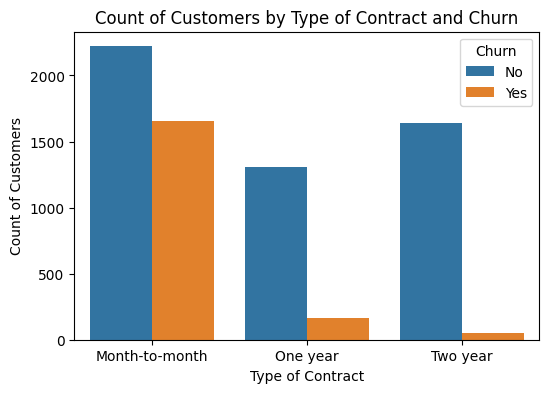

In [59]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='type', hue='churn')
plt.title('Count of Customers by Type of Contract and Churn')
plt.xlabel('Type of Contract')
plt.ylabel('Count of Customers')
plt.legend(title='Churn')
plt.show()

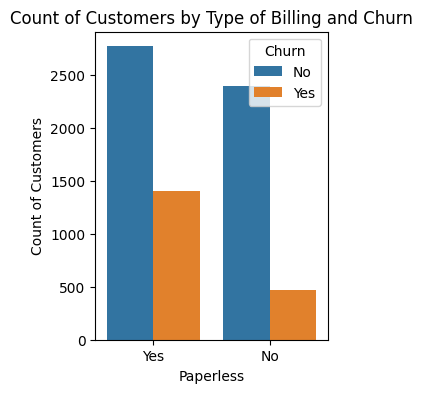

In [60]:
plt.figure(figsize=(3, 4))
sns.countplot(data=df, x='paperlessbilling', hue='churn')
plt.title('Count of Customers by Type of Billing and Churn')
plt.xlabel('Paperless')
plt.ylabel('Count of Customers')
plt.legend(title='Churn')
plt.show()

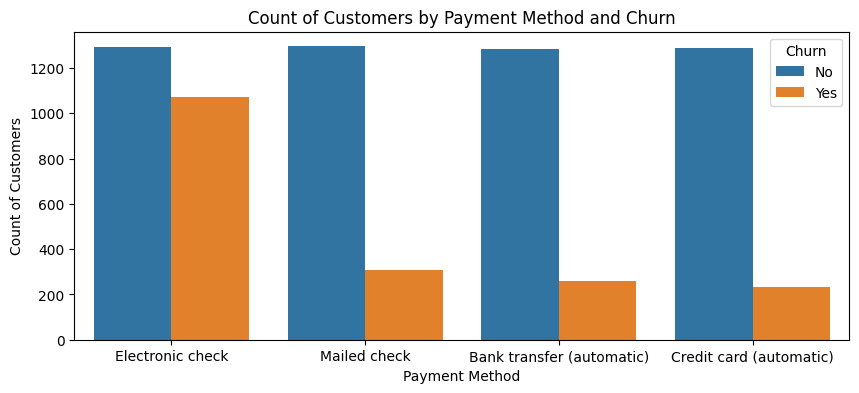

In [61]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='paymentmethod', hue='churn')
plt.title('Count of Customers by Payment Method and Churn')
plt.xlabel('Payment Method')
plt.ylabel('Count of Customers')
plt.legend(title='Churn')
plt.show()

Further analysis is needed to determine which customer account profiles correlate with lower churn overall.

## Feature Engineering

In addition to the above features, a 'contract length' feature can be derived, showing customer loyalty

In [62]:
# Define contract valid date in date time

contract_valid_date = pd.to_datetime('2020-02-01 00:00:00')

In [63]:
# Create contract length feature

df['contract_length'] = np.where(
    df['enddate'].isna(), 
    (contract_valid_date - df['begindate']).dt.days, 
    (df['enddate'] - df['begindate']).dt.days
)

In [64]:
df.head()

,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,gender,...,dependents,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,multiplelines,contract_length
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,No,DSL,No,Yes,No,No,No,No,No,31.0
1,5575-GNVDE,2017-04-01,NaT,One year,No,Mailed check,56.95,1889.50,No,Male,...,No,DSL,Yes,No,Yes,No,No,No,No,1036.0
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,DSL,Yes,Yes,No,No,No,No,No,61.0
3,7795-CFOCW,2016-05-01,NaT,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,DSL,Yes,No,Yes,Yes,No,No,No,1371.0
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,Fiber optic,No,No,No,No,No,No,No,61.0


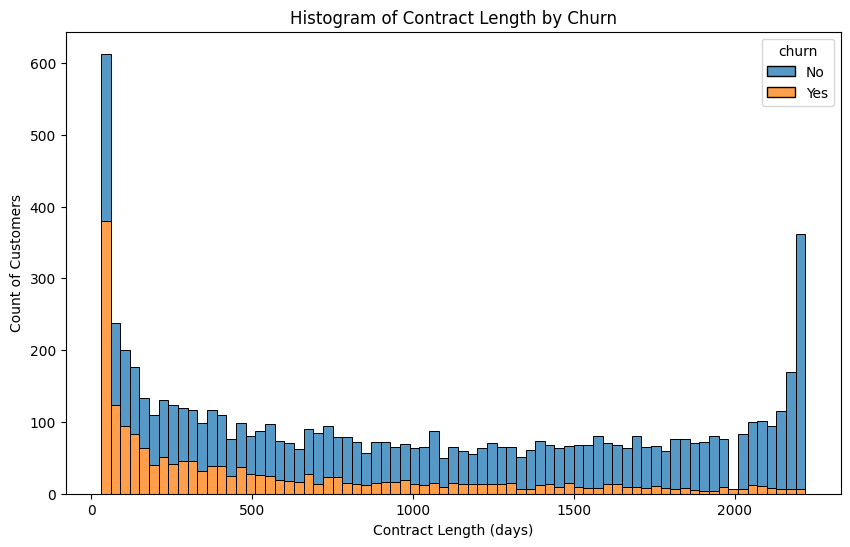

In [65]:
# Visualization of customer churn by contract length

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='contract_length', hue='churn', multiple='stack', binwidth=30)
plt.title('Histogram of Contract Length by Churn')
plt.xlabel('Contract Length (days)')
plt.ylabel('Count of Customers')
plt.show()

Note: Churn is highest when customers are new and normalizes as contract length increases

## Model Selection and Training

### Encoding

**Encoding** Label encoding and OHE are used for binary categorical features, and features with more that one category, repectively. 

**Label (binary):**

- paperlessbilling
- churn
- gender
- seniorcitizen
- partner
- dependents
- onlinesecurity
- onlinebackup
- deviceprotection
- techsupport
- streamingtv
- streamingmovies
- multiplelines

**OHE (multi class):**
- type
- paymentmethod
- internetservice

In [66]:
df_copy = df.copy()

In [67]:
# Define columns for OHE and LE

ohe_columns = ['type', 'paymentmethod', 'internetservice']
le_columns = [
    'paperlessbilling',
    'churn',
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'multiplelines'
]

In [68]:
# Encode binary columns
df_copy = pd.get_dummies(df_copy, columns=ohe_columns, drop_first=True)

In [69]:
# Encode multi category columns

for column in le_columns:
    df_copy[column] = le.fit_transform(df_copy[column])

In [70]:
df_copy.head()

,customerid,begindate,enddate,paperlessbilling,monthlycharges,totalcharges,churn,gender,seniorcitizen,partner,...,streamingmovies,multiplelines,contract_length,type_One year,type_Two year,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check,internetservice_Fiber optic,internetservice_No
0,7590-VHVEG,2020-01-01,NaT,1,29.85,29.85,0,0,0,1,...,0,0,31.0,0,0,0,1,0,0,0
1,5575-GNVDE,2017-04-01,NaT,0,56.95,1889.50,0,1,0,0,...,0,0,1036.0,1,0,0,0,1,0,0
2,3668-QPYBK,2019-10-01,2019-12-01,1,53.85,108.15,1,1,0,0,...,0,0,61.0,0,0,0,0,1,0,0
3,7795-CFOCW,2016-05-01,NaT,0,42.30,1840.75,0,1,0,0,...,0,0,1371.0,1,0,0,0,0,0,0
4,9237-HQITU,2019-09-01,2019-11-01,1,70.70,151.65,1,0,0,0,...,0,0,61.0,0,0,0,1,0,1,0


### Creation of Training, Validation and Test Sets

Training, Validation and Test Sets are created prior to model training. Dropped columns include columns such as customerid which is irrelevant in the analysis; begindate and enddate are also dropped due to the presence of the contract_length feature.

Also note that the data is stratified as it is split in order to retain the original distribution of the data in relation to the target variable

In [71]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   customerid                             7032 non-null   object        
 1   begindate                              7032 non-null   datetime64[ns]
 2   enddate                                1869 non-null   datetime64[ns]
 3   paperlessbilling                       7032 non-null   int64         
 4   monthlycharges                         7032 non-null   float64       
 5   totalcharges                           7032 non-null   float64       
 6   churn                                  7032 non-null   int64         
 7   gender                                 7032 non-null   int64         
 8   seniorcitizen                          7032 non-null   int64         
 9   partner                                7032 non-null   int64   

In [72]:
# Define target variable

target = df_copy['churn']
features = df_copy.drop([
    'churn', # This is the target variable
    'customerid',
    'begindate',
    'enddate',
], axis=1)

In [73]:
# Split the data into training and test sets
features_train_valid, features_test, target_train_valid, target_test = train_test_split(features, target, test_size=0.2, random_state=12345, stratify=target)

In [74]:
# Split 2 - Split Train+Validation into a second Train+Validation

features_train, features_valid, target_train, target_valid = train_test_split(
    features_train_valid, target_train_valid, test_size=0.20, random_state=12345, stratify=target_train_valid)

### Random Forest Classifier

In [75]:
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=12345)

# Train the classifier on the training data
rf_classifier.fit(features_train, target_train)

RandomForestClassifier(random_state=12345)

In [76]:
# Predict on the validation set
target_pred = rf_classifier.predict(features_valid)
target_pred_proba = rf_classifier.predict_proba(features_valid)[:, 1]  # probabilities for ROC AUC

# Calculate ROC AUC
roc_auc = roc_auc_score(target_valid, target_pred_proba)
print(f'ROC AUC Score: {roc_auc}')

# Calculate accuracy
accuracy = accuracy_score(target_valid, target_pred)
print(f'Accuracy Score: {accuracy}')

ROC AUC Score: 0.8511138824329686
Accuracy Score: 0.8115555555555556


#### Random Forest Hyperparameter Tuning

In [77]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
}

# Setup the grid search
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=12345),
                           param_grid=param_grid,
                           cv=5,
                           scoring='roc_auc',
                           )

# Perform the grid search on the training data
grid_search.fit(features_train, target_train)

# Best model
best_rf = grid_search.best_estimator_
print('Best Random Forest Parameters:', grid_search.best_params_)

Best Random Forest Parameters: {'n_estimators': 200}


### Logistic Regression

Logistic Regression is another model we can use to predict churn. To prevent data leakage a pipeline is set up with a scaler to ensure features have a similar influence during model training

In [78]:
# Set up the pipleine for logistic regression model

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression(random_state=12345))
])

In [79]:
# Train the LR model

pipeline.fit(features_train, target_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('log_reg', LogisticRegression(random_state=12345))])

In [80]:
target_val_pred = pipeline.predict(features_valid)
target_val_pred_proba = pipeline.predict_proba(features_valid)[:, 1]

val_roc_auc = roc_auc_score(target_valid, target_val_pred_proba)
val_accuracy = accuracy_score(target_valid, target_val_pred)

print("Validation ROC-AUC:", val_roc_auc)
print("Validation Accuracy:", val_accuracy)

Validation ROC-AUC: 0.8523609772688623
Validation Accuracy: 0.8133333333333334


### Boosted Models - XGBoost

XGBoost is a popular model used for classification, with the advantage of a boosted learning algorithm. Below the XGB model tested with some simple hyperparameters for tuning.

In [81]:
import xgboost as xgb

In [82]:
# Initialize the XGBoost classifier
# We are setting the eval_metric is  to 'logloss' for binary modeling such as churn
xgb_classifier = xgb.XGBClassifier(
    objective='binary:logistic',
    seed=12345,
    eval_metric='logloss', 
    use_label_encoder=False
)

# Train the classifier
# Note that we are optimizing for early stopping at ten rounds
xgb_classifier.fit(
    features_train, 
    target_train, 
    eval_set=[(features_valid, target_valid)],
    verbose=False,
    early_stopping_rounds=10
)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=12345,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=12345,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, ...)

In [83]:
# Predict probabilities on validation set
valid_pred_proba = xgb_classifier.predict_proba(features_valid)[:, 1]

# Calculate ROC AUC for the XGB model
valid_roc_auc = roc_auc_score(target_valid, valid_pred_proba)
print(f"Validation ROC AUC: {valid_roc_auc}")

# Calculate accuracy for the XGB model
valid_predictions = xgb_classifier.predict(features_valid)
valid_accuracy = accuracy_score(target_valid, valid_predictions)
print(f"Validation Accuracy: {valid_accuracy}")

Validation ROC AUC: 0.901451164899949
Validation Accuracy: 0.8613333333333333


In [84]:
# Create the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1],
}

# Set up the grid search
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=3, scoring='roc_auc', verbose=1, n_jobs=-1)
grid_search.fit(features_train, target_train)

# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best ROC-AUC found: ", grid_search.best_score_)


Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters found:  {'learning_rate': 0.1, 'n_estimators': 200}
Best ROC-AUC found:  0.87640381260726


### Best Model Selection

Models are selected systematically with the hyperparameters and tuning applied. The three models studied are Random Forest, Logistic Regression and XGB Boost.

- The model selection first trains the model on the training set and selects the best model based on its AUC-ROC score on the validation set.
- The best model is then selected and tested on the test set.
- The final results display the AUC-ROC score and the accuracy of the model, evaluated on the test set.

**Note:** Hyperparameter tuning is already applied in the best model selection sequence.

In [85]:
models = {   
    'Random Forest': RandomForestClassifier(n_estimators=200, random_state=12345),
    'Logistic Regression': LogisticRegression(random_state=12345),
    'XGBoost': xgb.XGBClassifier(
    objective='binary:logistic',
    seed=12345,
    eval_metric='logloss', 
    use_label_encoder=False
)

}

# Hyperparameters
param_grids = {   
    'Random Forest': {'n_estimators': [200]},  # From tuning above
    'Logistic Regression': {'C': [1]},  # Placeholder as there are no hyperparameters to tune
    'XGBoost': {'n_estimators': [200], 'learning_rate': [0.1]}  # From tuning above
}
# Dictionary to store the best models and their scores
best_models = {}
scores = {}

In [86]:
# Training and tuning each model
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='roc_auc', n_jobs=-1)
    grid_search.fit(features_train, target_train)  # Fit models on the training set
    best_model = grid_search.best_estimator_
    best_models[name] = best_model
    
    # Evaluate on the validation set
    valid_proba = best_model.predict_proba(features_valid)[:, 1]
    auc_score = roc_auc_score(target_valid, valid_proba)
    scores[name] = auc_score
    print(f'{name} best AUC-ROC: {auc_score}')

Random Forest best AUC-ROC: 0.8525715257476496


/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression best AUC-ROC: 0.8464858649088568
XGBoost best AUC-ROC: 0.9088122636390875


In [87]:
best_model_name = max(scores, key=scores.get)
best_model = best_models[best_model_name]

# Final evaluation on the test set
test_proba = best_model.predict_proba(features_test)[:, 1]
final_auc = roc_auc_score(target_test, test_proba)
final_acc = accuracy_score(target_test, best_model.predict(features_test))

print(f'Final Best Model: {best_model_name}')
print(f'Test AUC-ROC: {final_auc}')
print(f'Test Accuracy: {final_acc}')

Final Best Model: XGBoost
Test AUC-ROC: 0.8981511199921314
Test Accuracy: 0.8578535891968728


Note: The best model is the XGBoost model with a AUC-ROC of 90% an accuracy of 86% when evaluated on the test set.

#### Further notes on Best Model: XGBoost features

Equally important to predictions is the importance of features in how the model is trained. Feature importance refers to the priority with with feautures are used to develop the model (weight). Below, feature importance is explored for the best model - XGBoost

In [88]:
# Define feature importance for the 'best_model' - XGBoost

importance = best_model.feature_importances_

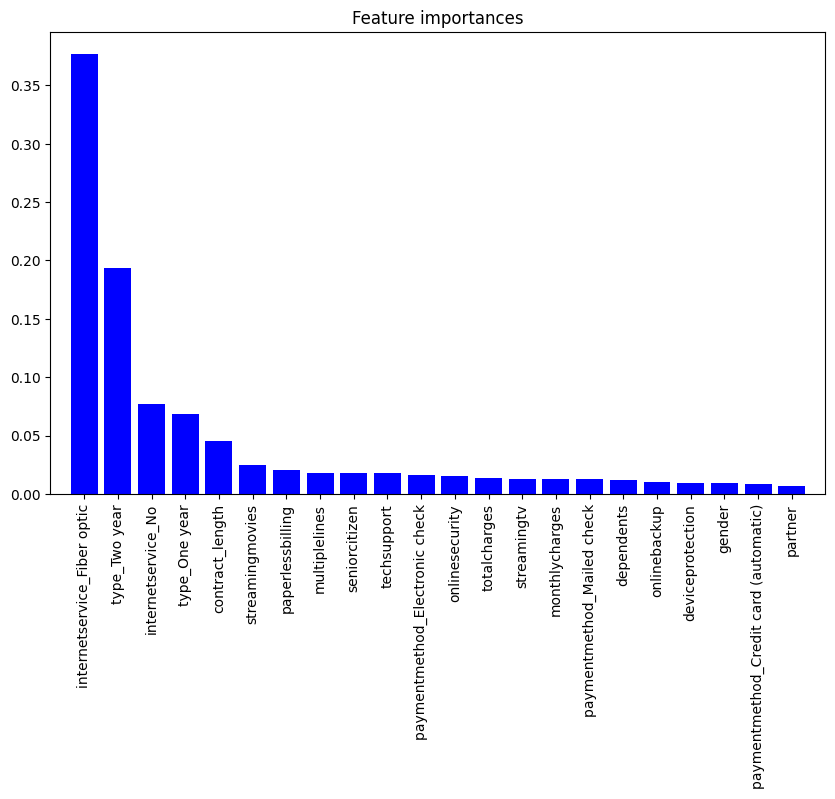

In [89]:
# Sorting feature names by weight in the model's algorithm

feature_names = features_train.columns
indices = np.argsort(importance)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(features_train.shape[1]), importance[indices],
        color="b", align="center")
plt.xticks(range(features_train.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, features_train.shape[1]])
plt.show()

Note: The top five features by weight are: 

- Fiber Optic Service
- Two Year contract type
- Internet Service
- One Year contract type
- Contract Length (tenure)

## Conclusions and Recommendations

Based on the analysis and model, we understand that fiber optic service, contract type and length (tenure) and internet service in general are key indicators for churn.

- Some recommendations are to explore the Fiber Optic Service which is the highest indictor for churn - perhaps customers are searching for deals across competitor companies with bundled fiber optic service. Exploring the value proposition for the current fiber optic service could be beneficial.

- Customers who are loyal generally do not churn, and so exploring incentives to value loyal customers could be beneficial.

- Customers who have two-year contracts churn less than those who have one year contracts, and so exploring incentives for these type of contracts could be beneficial. 

**Model Accuracy:** The model must be evaluated for accuracy as new data becomes available and customers with certain key indicators can be identified earlier and marketed incentives before they churn.

**ROI:** Exploring the ROI of the above options would be important, weighing the cost of customer churn / churn avoidance against the cost marketing initiatives as well as evaluating company churn against competitor/industry average churn.

## Project Solution Report

### Recap: Project Plan

The steps of the plan outlined in the project plan were all performed. To ensure that the analysis was completed accurately, no steps were skipped. An additional step that could be beneficial to the client would be a full ROI analysis of the project vs. the performance gains from implementing the suggestions recommended; however, this would require some financial modeling and project management information such as FTE rates, staffing, time tracking, etc.

The steps below from the project plan were executed methodically with a quality review:

*Data Collection and Exploratory Data Analysis:* An analysis of the RAW data for trends and feature engineering

*Feature Engineering:* Creation of new features from the data to inform the predictive model

*Model Selection and Training for Predictive Modeling:* Development of an ML model to predict churn

*Quality Assurance / Quality Review:* Check on accuracy of the code and methodology outlined above.

*Conclusions and Recommendations:* Strategy recommendations for the marketing team based on data findings and churn predictions.

To complement the value proposition of the project, a simple ROI analysis could be performed. For the efficacy of the model itself, a one- to three-year ROI could be performed to track performance over time. 

### Project Challenges and Solutions

There were few difficulties encountered in completing the analysis. The data was mostly clean and needed standardization to streamline the analysis. There were **no duplicates** and **null values** represented a very small percentage of the total data set. 

- The data came in separate files, a single data frame needed to be created in order to perform a full analysis and train a model. 
- Because the data came with a unique identifier, the data files were able to be merged on the ID; it was not necessary to create unique identifiers for each entry. 

**Data leakage** is a concern for data sets like these and so a pipeline was created to prevent data leakage and assure a robust model. Certain columns needed to be dropped to retain a robust model.

**Categorical data was encoded** with OHE and Label Encoding. The data then needed to be scaled to ensure the model sees each feature equally.

**There were some limitations for training and testing models** that have many hyperparameters virtually and not on local machines (processing power). To address the issue, a simplified version of fine tuning was used to meet the AUC-ROC scores required.

### Recap: Key Steps in Data Analysis and Modeling

The project involved accurately predicting churn for customers and can be divided into four steps: *Data Cleaning* *EDA* *Feature Engineering* *Model Selection and Training*

**Data Cleaning** ensures that the data is formatted properly for analysis. For example, column names were converted to lower case, and data types needed to be converted to numerical data for analysis. 

**Exploratory Data Analysis (EDA)** provides more context about the data and its characteristics and trends to inform feature engineering. Descriptive statistics were pulled from the data and visualized in order to provide context on any trends. Churn needed to be defined and a new column for churn was created.

**Feature Engineering** takes known qualities and creates new features used for model training. A column for contract_length (or tenure) was derived as an indicator for customer loyalty.

**Model Selection/Training** is perhaps the most complex, where three different models are systematically trained, tuned and evaluated for the best predictive model. Three models most popular with the task of classification (churn or no-churn) were seen as potential candidates - **logistic regression**, **random forest**, and **XGBoost**. 

- Data was split into training, validation and testing sets, models were trained and tested on the validation set and fine tuning was applied to two of the three models.

- Once the models were trained and tested, each was evaluated concurrently on the test set in order to determine a best-fit model by AUC-ROC and accuracy metrics.

### Final Model and Quality Score

The final model best suited to predict churn with the data set provided with the XGBoost model, tuned with 200 trees to start. The AUC-ROC is 90% with a test accuracy of 86%. 

**Final Best Model: XGBoost**
Test AUC-ROC: 0.8981511199921314
Test Accuracy: 0.8578535891968728

- An AUC-ROC of 90% can be interpreted as a model providing predictions that are correct 90% of the time.

- The XGBoost model **exceeds the highest assessment criteria for the model of > 0.88,** as outlined in the criteria below. 

Assessment criteria:

AUC-ROC < 0.75 — 0 SP
0.75 ≤ AUC-ROC < 0.81 — 4 SP
0.81 ≤ AUC-ROC < 0.85 — 4.5 SP
0.85 ≤ AUC-ROC < 0.87 — 5 SP
0.87 ≤ AUC-ROC < 0.88 — 5.5 SP
AUC-ROC ≥ 0.88 — 6 SP

- Further, fine-tuning of the model can be explored to increase accuracy above 90%.

- Finally, feature weights of the XGBoost model were explored and visualized in order to communicate meaningful insights about churn and customer data.